<a href="https://colab.research.google.com/github/MoRebaie/NLP-in-Tensorflow/blob/master/Course_3_Week_2_Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)

1.14.0-rc1


In [3]:
# Uncomment and run this if you haven't install tensorflow 2.0x yet
#!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 564kB/s 
     |████████████████████████████████| 419kB 43.2MB/s 
     |████████████████████████████████| 3.0MB 35.0MB/s 
  Found existing installation: tensorflow 1.14.0rc1
    Uninstalling tensorflow-1.14.0rc1:
      Successfully uninstalled tensorflow-1.14.0rc1


In [2]:
# Double check TF 2.0 is installed, click on 'reset all runtimes' button

import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [3]:
# If tensorflow_datasets fails to run, type this:
# !pip install -q tensorflow datasets
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

W0626 14:35:45.080673 139975850780544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
train_data, test_data = imdb ['train'], imdb ['test']

In [0]:
tokenizer = info.features ['text'].encoder

In [6]:
info
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=0.1.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    urls=['http://ai.stanford.edu/~amaas/data/sentiment/'],
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>)
    },
    total_num_examples=100000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=25000>,
        'train': <tfds.core.SplitInfo num_examples=25000>,
        'unsupervised': <tfds.core.SplitInfo num_examples=50000>
    },
    supervised_keys=('text', 'label'),
    citation='"""
        @InProceedings{maas-EtAl:2011:ACL-HLT2011,
          autho

In [9]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [15]:
sample_string = "Tensorflow from basics to mastery"

tokenized_string = tokenizer.encode(sample_string)
print ("Tokenized String is {}".format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ("Original String is {}".format(original_string))

Tokenized String is [6307, 2327, 2934, 7961, 48, 4249, 4429, 7, 2652, 8050]
Original String is Tensorflow from basics to mastery


In [16]:
for ts in tokenized_string:
  print("{} ---> {}".format(ts, tokenizer.decode([ts])))

6307 ---> Ten
2327 ---> sor
2934 ---> flow
7961 --->  
48 ---> from 
4249 ---> basi
4429 ---> cs 
7 ---> to 
2652 ---> master
8050 ---> y


In [22]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 10

model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit (train_data, epochs = num_epochs, validation_data = test_data)

Epoch 1/10
25000/25000 [==============================] - 226s 9ms/step - loss: 0.6856 - accuracy: 0.5259 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 161s 6ms/step - loss: 0.6835 - accuracy: 0.5337 - val_loss: 0.6842 - val_accuracy: 0.5364
Epoch 3/10
25000/25000 [==============================] - 161s 6ms/step - loss: 0.6828 - accuracy: 0.5388 - val_loss: 0.6840 - val_accuracy: 0.5380
Epoch 4/10
25000/25000 [==============================] - 159s 6ms/step - loss: 0.6822 - accuracy: 0.5416 - val_loss: 0.6840 - val_accuracy: 0.5397
Epoch 5/10
25000/25000 [==============================] - 162s 6ms/step - loss: 0.6817 - accuracy: 0.5435 - val_loss: 0.6842 - val_accuracy: 0.5401
Epoch 6/10
25000/25000 [==============================] - 162s 6ms/step - loss: 0.6813 - accuracy: 0.5445 - val_loss: 0.6844 - val_accuracy: 0.5401
Epoch 7/10
25000/25000 [==============================] - 164s 7ms/step - loss: 0.6810 - accuracy: 0.544

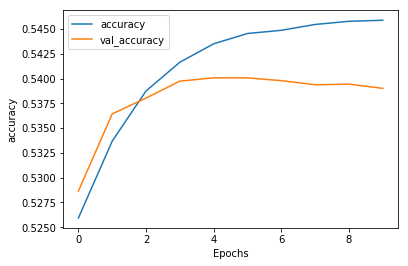

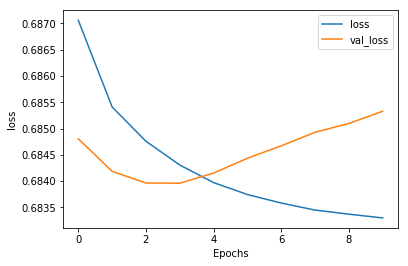

In [28]:
import matplotlib.pyplot as plt

def plot_graphs (history, string):
  plt.plot (history.history[string])
  plt.plot (history.history['val_' + string])
  plt.xlabel ("Epochs")
  plt.ylabel (string)
  plt.legend([string, 'val_' + string])
  plt.show()
  
plot_graphs (history, "accuracy")
plot_graphs (history, "loss")